> Final Document Description: This document was used to train T_Model (MobileNetV2), tested on Islam's Transverse image type dataset.

*  For Liu's Transverse TestSet:    best_acc = 85.31%  

> The best hyperparameters obtained after screening are:
* batch_size = 16

* epoch = 40

* lr = 0.001

#### Heterogeneous dataset testing： Islam's Transverse Dataset (Non_kidney_stone: normal-cyst-tumor)


##### train

c:\Users\6622300074\AppData\Local\anaconda3\envs\kidneystone\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\6622300074\AppData\Local\anaconda3\envs\kidneystone\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.602105,0.404604,0.820690,00:10
1,0.315825,0.129024,0.958621,00:10
2,0.182929,0.114407,0.965517,00:10
3,0.132225,0.069933,0.958621,00:10
4,0.126068,0.085263,0.968966,00:10
5,0.139275,0.050854,0.982759,00:10
6,0.104971,0.033024,0.993103,00:10
7,0.125254,0.226356,0.931035,00:10
8,0.128924,0.054219,0.982759,00:10
9,0.119990,0.107853,0.972414,00:09


Better model found at epoch 0 with valid_loss value: 0.4046037197113037.
Better model found at epoch 0 with accuracy value: 0.8206896781921387.
Better model found at epoch 1 with valid_loss value: 0.12902389466762543.
Better model found at epoch 1 with accuracy value: 0.9586206674575806.
Better model found at epoch 2 with valid_loss value: 0.11440706998109818.
Better model found at epoch 2 with accuracy value: 0.9655172228813171.
Better model found at epoch 3 with valid_loss value: 0.069932721555233.
Better model found at epoch 4 with accuracy value: 0.9689655303955078.
Better model found at epoch 5 with valid_loss value: 0.050853658467531204.
Better model found at epoch 5 with accuracy value: 0.982758641242981.
Better model found at epoch 6 with valid_loss value: 0.03302362561225891.
Better model found at epoch 6 with accuracy value: 0.9931034445762634.
Better model found at epoch 16 with valid_loss value: 0.027976874262094498.
Better model found at epoch 18 with valid_loss value: 0.0

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

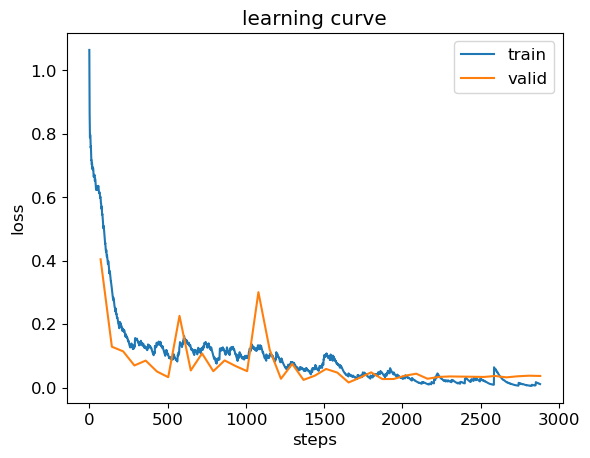

In [ ]:
import fastbook
from fastbook import *
from fastai.vision.all import *
import random
import numpy as np
import torch

# set seed
seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

path = Path('C:/Users/6622300074/Desktop/PHD/GitHub/FATCKSDS/data/Train_set/Dataset_crop_black')
train_fnames = get_image_files(path/"Train")

augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=seed),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

# dls = dblock.dataloaders(train_fnames)
dls = dblock.dataloaders(train_fnames, batch_size=16)


# 使用MobileNet
model_instance = mobilenet_v2(pretrained=True)
model = nn.Sequential(create_body(model_instance, pretrained=False, cut=-1), create_head(nf=1280, n_out=2))

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

# define callbacks
cbs = [
    SaveModelCallback(monitor='valid_loss', fname='C:/Users/6622300074/Desktop/PHD/GitHub/FATCKSDS/Models/best_model_valid_loss_MobileNetV2', 
                      every_epoch=False, 
                      with_opt=True),
    SaveModelCallback(monitor='accuracy', fname='C:/Users/6622300074/Desktop/PHD/GitHub/FATCKSDS/Models/best_model_valid_acc_MobileNetV2', 
                      every_epoch=False, 
                      with_opt=True)
]


learn.fit_one_cycle(40, 1e-3, cbs=cbs)
# learn.fit_one_cycle(40, 0.1, cbs=cbs)

# save model
learn.save('C:/Users/6622300074/Desktop/PHD/GitHub/FATCKSDS/Models/final_model_MobileNetV2')

# draw loss
learn.recorder.plot_loss(skip_start=0, with_valid=True)


##### test ----- for Islam Transverse images


评估模型：最佳验证损失模型


              precision    recall  f1-score   support

           0     0.8930    0.7471    0.8136       514
           1     0.7826    0.9105    0.8417       514

    accuracy                         0.8288      1028
   macro avg     0.8378    0.8288    0.8276      1028
weighted avg     0.8378    0.8288    0.8276      1028




评估模型：最佳验证准确率模型


              precision    recall  f1-score   support

           0     0.8355    0.8794    0.8569       514
           1     0.8727    0.8268    0.8492       514

    accuracy                         0.8531      1028
   macro avg     0.8541    0.8531    0.8530      1028
weighted avg     0.8541    0.8531    0.8530      1028




评估模型：最终模型


              precision    recall  f1-score   support

           0     0.8355    0.8794    0.8569       514
           1     0.8727    0.8268    0.8492       514

    accuracy                         0.8531      1028
   macro avg     0.8541    0.8531    0.8530      1028
weighted avg     0.8541    0.8531    0.8530      1028



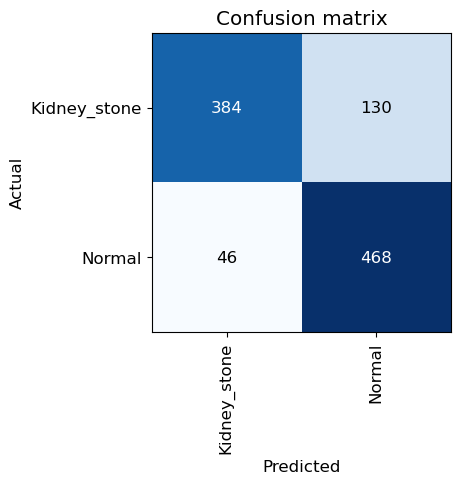

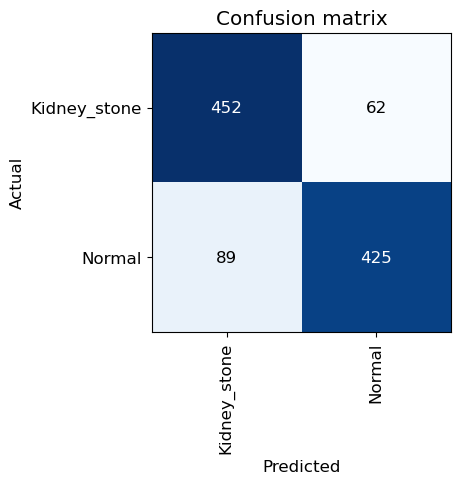

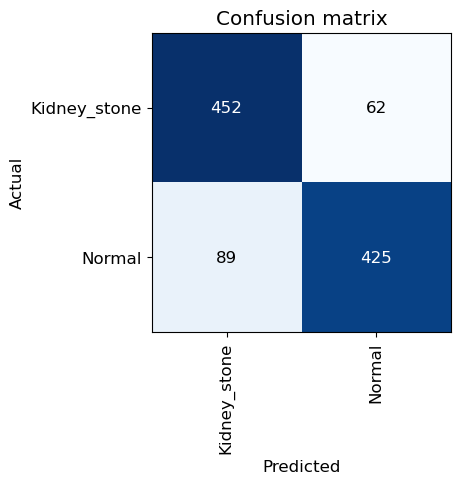

In [ ]:
from fastai.vision.all import *
from sklearn.metrics import classification_report
path = Path('C:/Users/6622300074/Desktop/PHD/GitHub/FATCKSDS/data/Test_set/Dataset_t')

all_files = get_image_files(path)

augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls_test = dblock.dataloaders(all_files, batch_size=32, num_workers=4)

# define model
model_instance = mobilenet_v2(pretrained=True)
model = nn.Sequential(create_body(model_instance, pretrained=True, cut=-1), create_head(nf=1280, n_out=2))

learn = Learner(dls_test, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

# load model
model_paths = {
    'Best validation loss model': 'C:/Users/6622300074/Desktop/PHD/GitHub/FATCKSDS/Models/best_model_valid_loss_MobileNetV2',
    'Best validation accuracy model': 'C:/Users/6622300074/Desktop/PHD/GitHub/FATCKSDS/Models/best_model_valid_acc_MobileNetV2',
    'final model': 'C:/Users/6622300074/Desktop/PHD/GitHub/FATCKSDS/Models/final_model_MobileNetV2'
}


for model_name, model_path in model_paths.items():
    learn.load(model_path)

    print(f"\nEvaluating the Model:{model_name}")
    
    preds, targets = learn.get_preds()
    preds = preds.argmax(dim=1)
    report = classification_report(targets, preds, digits=4)
    print(report)
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix()


#### Homogeneous dataset testing： Yildirim's Coronal Dataset (cropped_add_blackground)

##### test


评估模型：最佳验证损失模型


c:\Users\6622300074\AppData\Local\anaconda3\envs\kidneystone\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\6622300074\AppData\Local\anaconda3\envs\kidneystone\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


              precision    recall  f1-score   support

           0     0.7022    0.9494    0.8073       514
           1     0.9219    0.5973    0.7249       514

    accuracy                         0.7733      1028
   macro avg     0.8120    0.7733    0.7661      1028
weighted avg     0.8120    0.7733    0.7661      1028




评估模型：最佳验证准确率模型


              precision    recall  f1-score   support

           0     0.6339    0.9397    0.7571       514
           1     0.8835    0.4572    0.6026       514

    accuracy                         0.6984      1028
   macro avg     0.7587    0.6984    0.6798      1028
weighted avg     0.7587    0.6984    0.6798      1028




评估模型：最终模型


              precision    recall  f1-score   support

           0     0.6339    0.9397    0.7571       514
           1     0.8835    0.4572    0.6026       514

    accuracy                         0.6984      1028
   macro avg     0.7587    0.6984    0.6798      1028
weighted avg     0.7587    0.6984    0.6798      1028



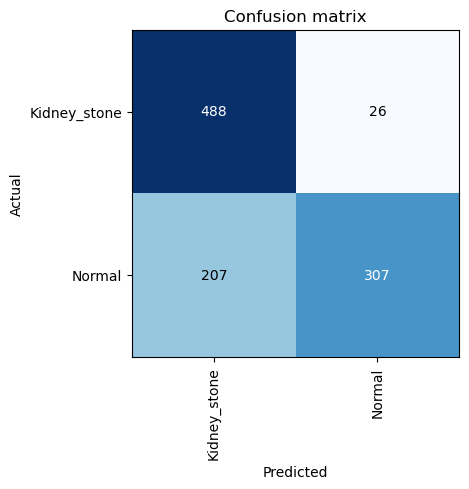

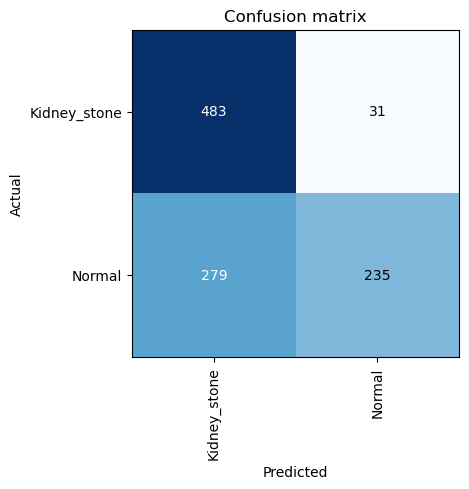

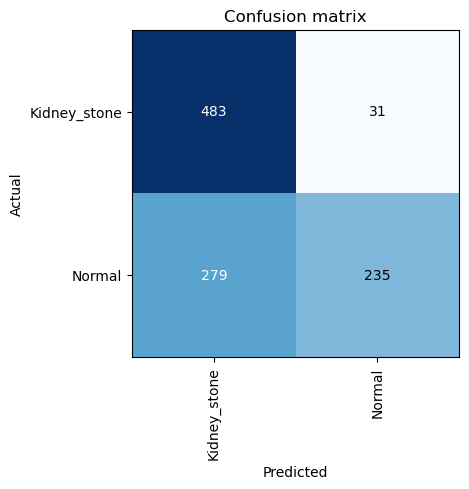

In [ ]:
from fastai.vision.all import *
from sklearn.metrics import classification_report
path = Path('C:/Users/6622300074/Desktop/PHD/KidneyStoneSub-2024-07-12-NEW-01/Test_set/Dataset_LIU_2024/Dataset_c_crop_black')

all_files = get_image_files(path)

augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls_test = dblock.dataloaders(all_files, batch_size=32, num_workers=4)

# 定义并加载MobileNet模型结构
model_instance = mobilenet_v2(pretrained=True)
model = nn.Sequential(create_body(model_instance, pretrained=True, cut=-1), create_head(nf=1280, n_out=2))

learn = Learner(dls_test, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)


model_paths = {
    'Best validation loss model': 'C:/Users/6622300074/Desktop/PHD/GitHub/FATCKSDS/Models/best_model_valid_loss_MobileNetV2',
    'Best validation accuracy model': 'C:/Users/6622300074/Desktop/PHD/GitHub/FATCKSDS/Models/best_model_valid_acc_MobileNetV2',
    'final model': 'C:/Users/6622300074/Desktop/PHD/GitHub/FATCKSDS/Models/final_model_MobileNetV2'
}

for model_name, model_path in model_paths.items():

    learn.load(model_path)

    print(f"\nEvaluating the Model: {model_name}")
    

    preds, targets = learn.get_preds()
    preds = preds.argmax(dim=1)
    

    report = classification_report(targets, preds, digits=4)
    
    print(report)
    
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix()
